In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack

In [2]:
dataset = pd.DataFrame()

In [3]:
path = './Class1/'

df_class1 = []

for i, filename in enumerate(glob.glob(os.path.join(path, '*.npy'))):
    df_class1.append(np.load(filename))
    dataset.loc[i, 'Class'] = '1' #defining label

In [4]:
path = './Class2/'

df_class2 = []

rows_class1 = dataset.shape[0]

for i, filename in enumerate(glob.glob(os.path.join(path, '*.npy'))):
    df_class2.append(np.load(filename))
    dataset.loc[i + rows_class1, 'Class'] = '2' #defining label

In [5]:
raw = df_class1 + df_class2
print(len(raw))

48


In [6]:
def get_fft_intensity(dataset, frequency, index_begin, index_final):
    feature_name = str(index_begin) + 'to' + str(index_final) + '_' + str(frequency) + 'Hz'
    for i, signal in enumerate(raw):
        fft = scipy.fftpack.fft(signal[index_begin:index_final])
        dataset.loc[i,feature_name] = np.abs(fft[frequency]) #defining label
        
    return dataset

In [7]:
dataset = get_fft_intensity(dataset,  3,  300,  400)
dataset = get_fft_intensity(dataset,  3,  700,  800)
dataset = get_fft_intensity(dataset,  4,  700,  800)
dataset = get_fft_intensity(dataset,  4, 1500, 1600)
dataset = get_fft_intensity(dataset,  3, 1600, 1700)
dataset = get_fft_intensity(dataset,  5, 1600, 1700)
dataset = get_fft_intensity(dataset,  4, 1800, 1900)
dataset = get_fft_intensity(dataset,  7, 1800, 1900)
dataset = get_fft_intensity(dataset,  2, 1900, 2000)
dataset = get_fft_intensity(dataset,  5, 1900, 2000)
dataset = get_fft_intensity(dataset,  9, 1800, 2000)
dataset = get_fft_intensity(dataset,  3, 2300, 2400)

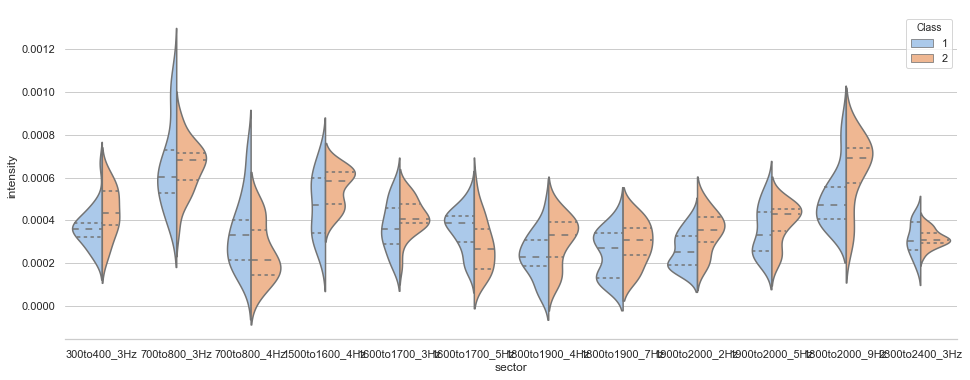

In [8]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(16,6))

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x='sector', y='intensity', hue="Class",
               split=True, inner="quart",
               data=pd.melt(dataset, 'Class', var_name='sector', value_name='intensity'))
sns.despine(left=True)

It looks like all columns are useful features!

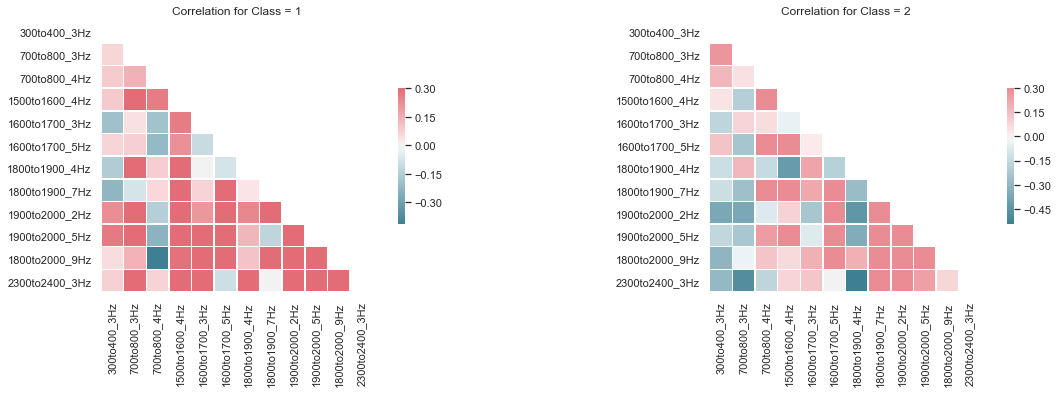

In [9]:
plt.figure(num=None, figsize=(20, 5))

for i in range(1,3):

    corr = dataset.loc[dataset['Class']==str(i)].corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True


    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Set up the matplotlib figure
    plt.subplot(1,2,i)
    plt.title('Correlation for Class = ' + str(i))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\Diogo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Diogo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


<Figure size 1080x1080 with 0 Axes>

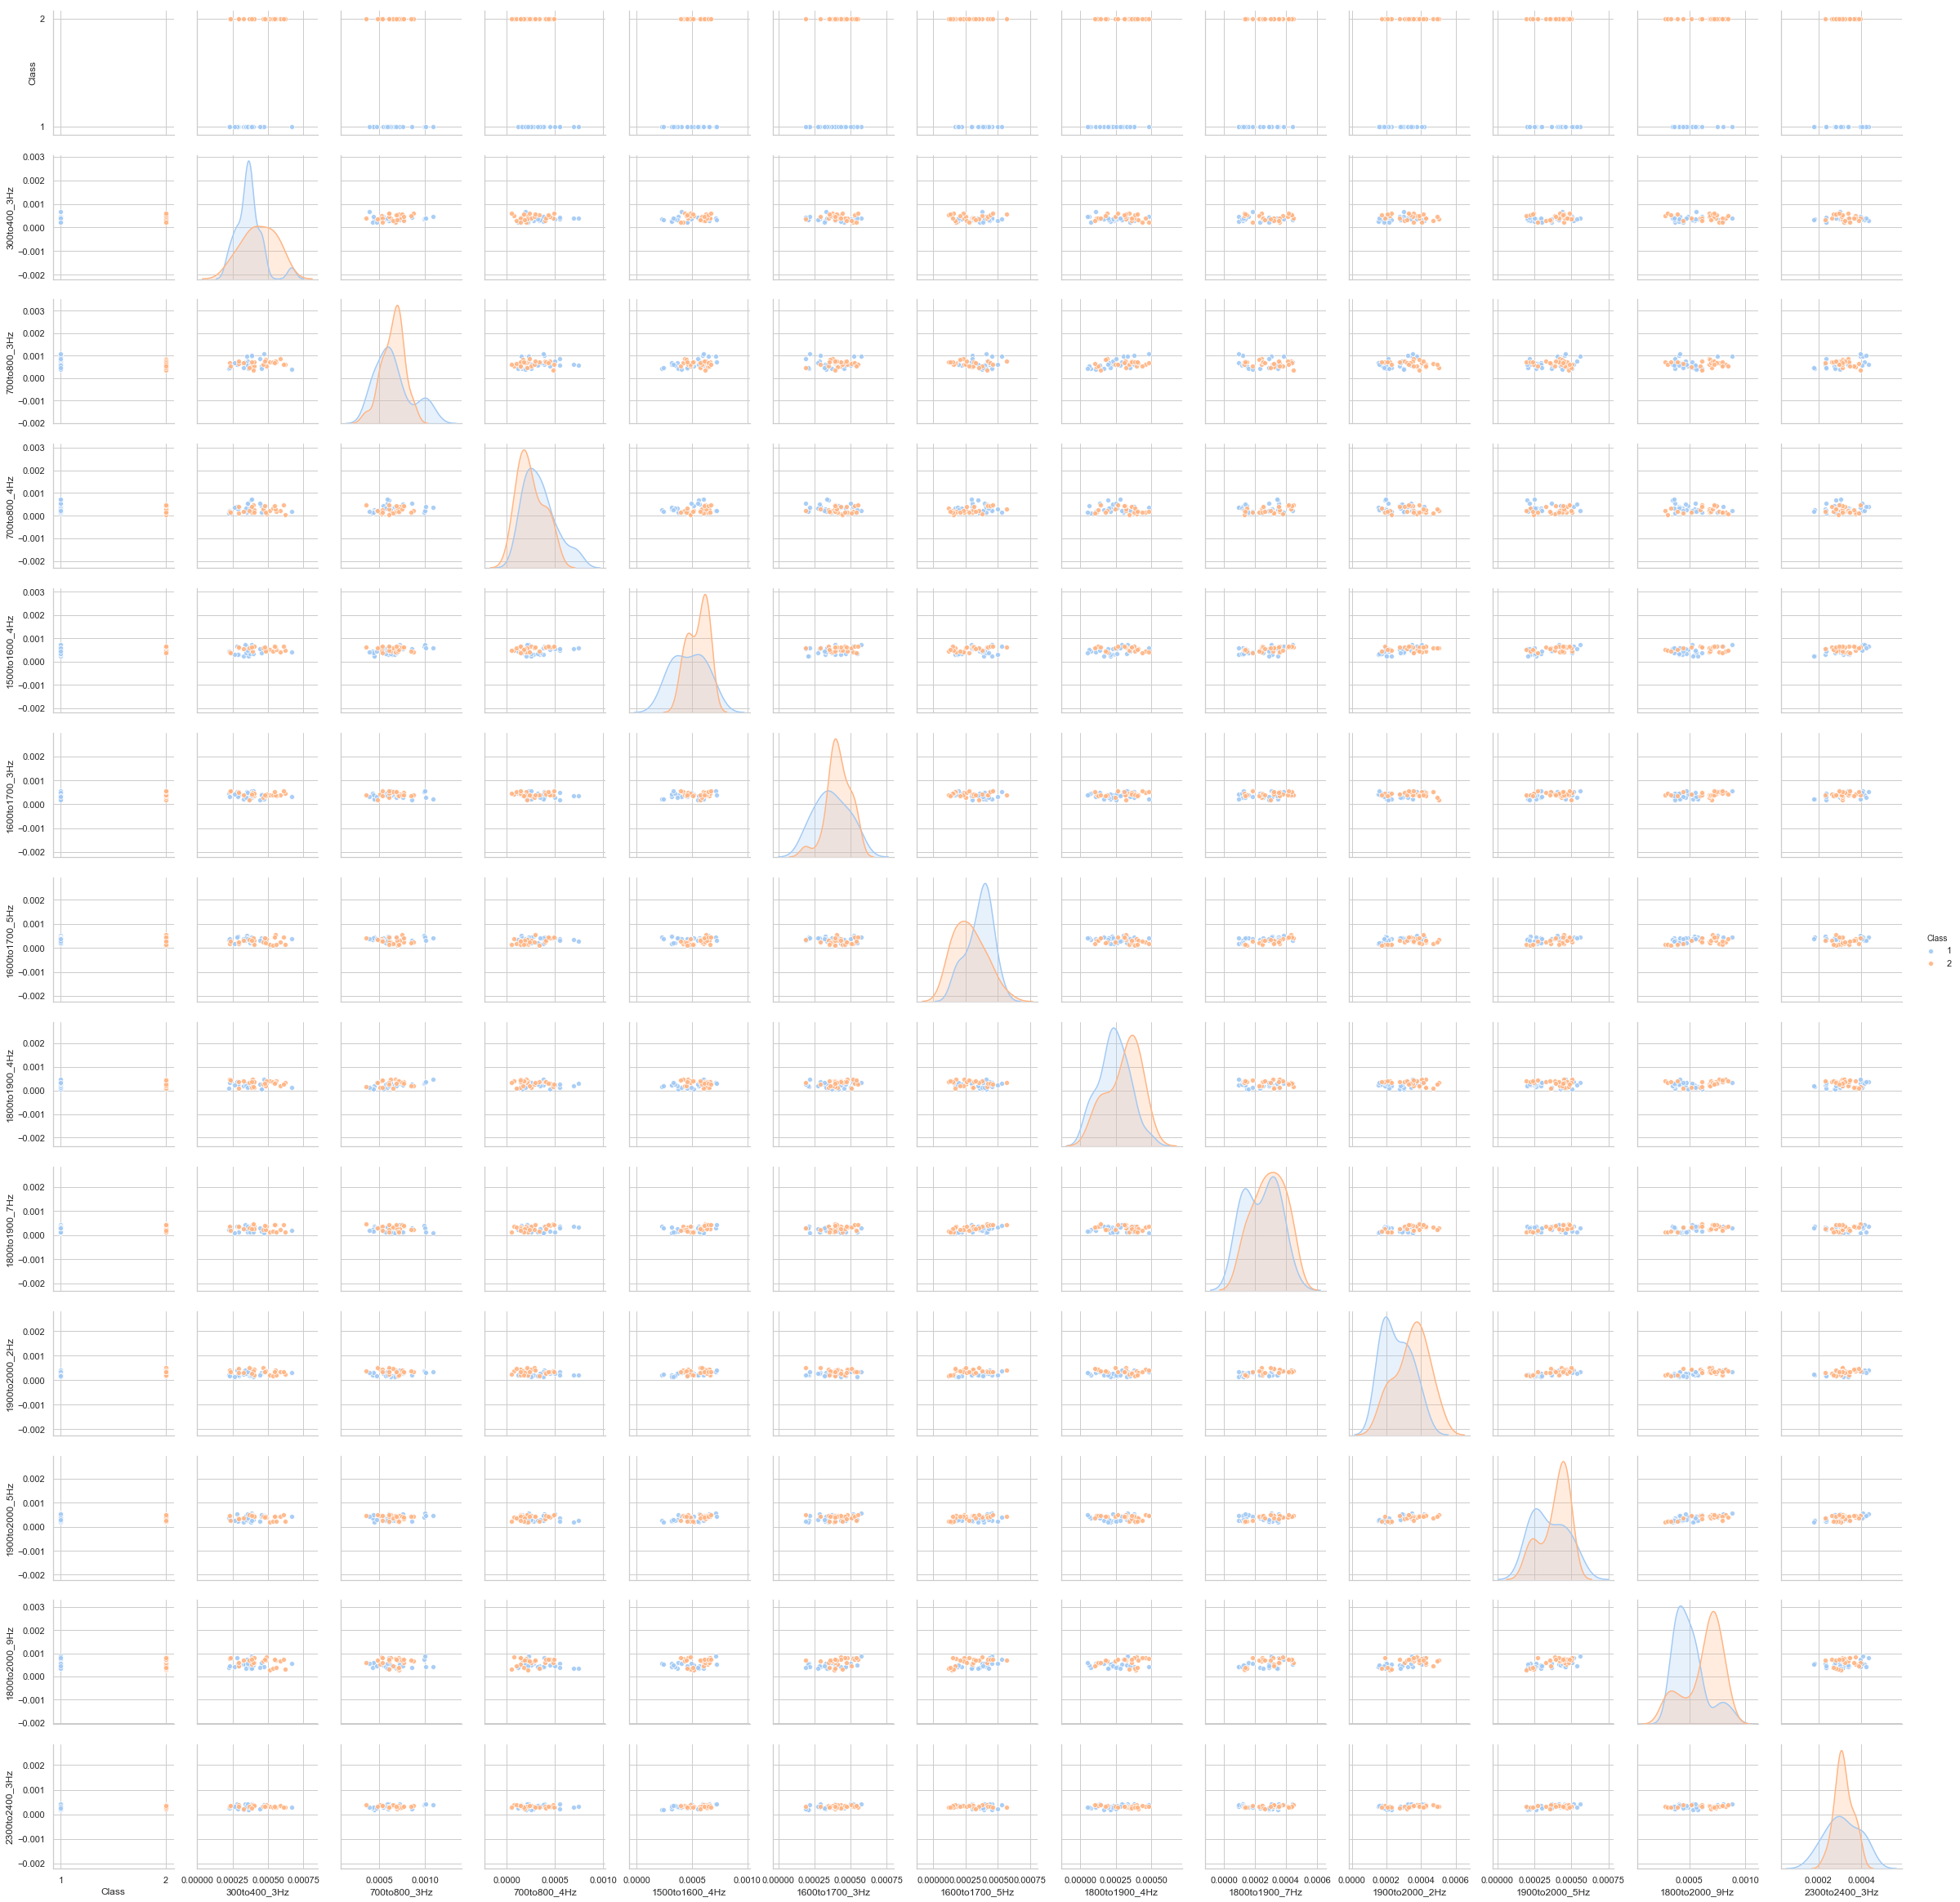

In [10]:
plt.figure(num=None, figsize=(15, 15))
sns.pairplot(dataset, hue='Class', plot_kws={'alpha':0.9})

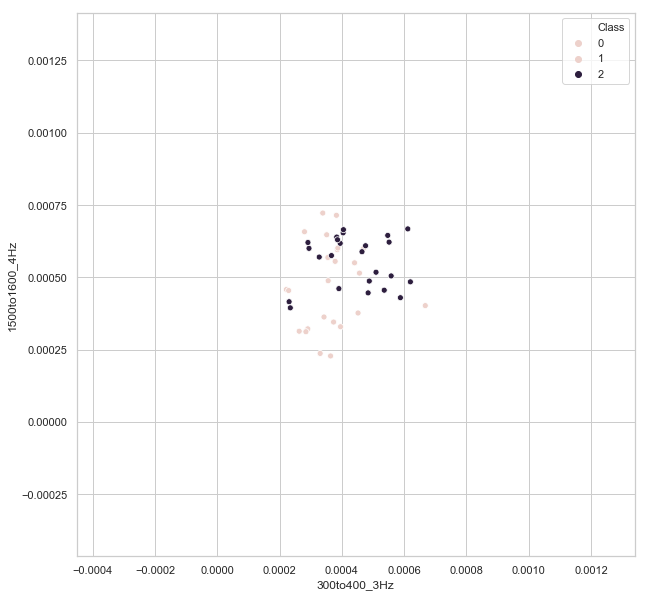

In [11]:
dataset_float = dataset.copy()
plt.figure(num=None, figsize=(10, 10))

dataset_float['Class'] = dataset_float['Class'].astype(int)
sns.scatterplot(x='300to400_3Hz', y='1500to1600_4Hz', hue='Class', data=dataset_float)

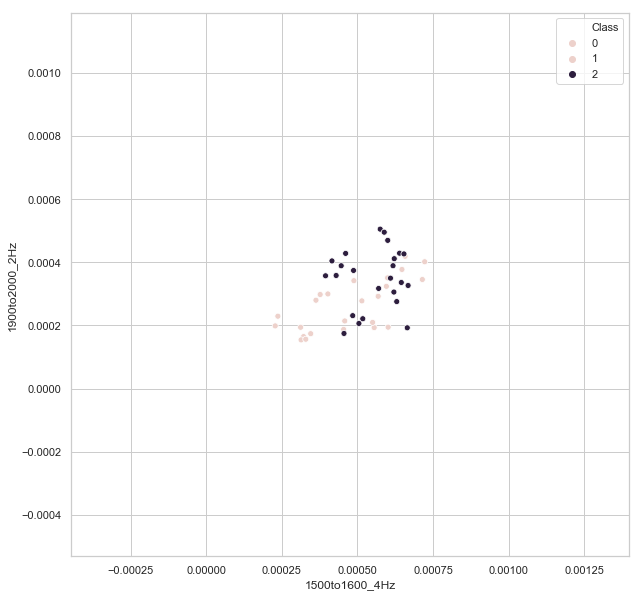

In [12]:
plt.figure(num=None, figsize=(10, 10))
dataset_float['Class'] = dataset_float['Class'].astype(int)
sns.scatterplot(x='1500to1600_4Hz', y='1900to2000_2Hz', hue='Class', data=dataset_float)

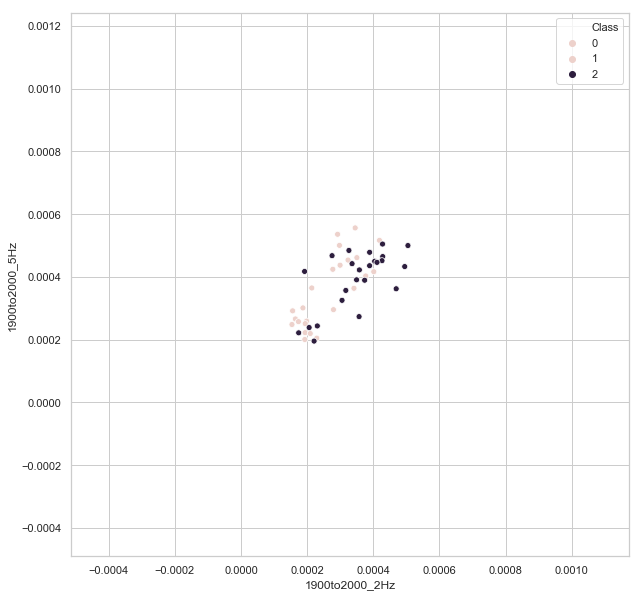

In [13]:
plt.figure(num=None, figsize=(10, 10))
dataset_float['Class'] = dataset_float['Class'].astype(int)
sns.scatterplot(x='1900to2000_2Hz', y='1900to2000_5Hz', hue='Class', data=dataset_float)

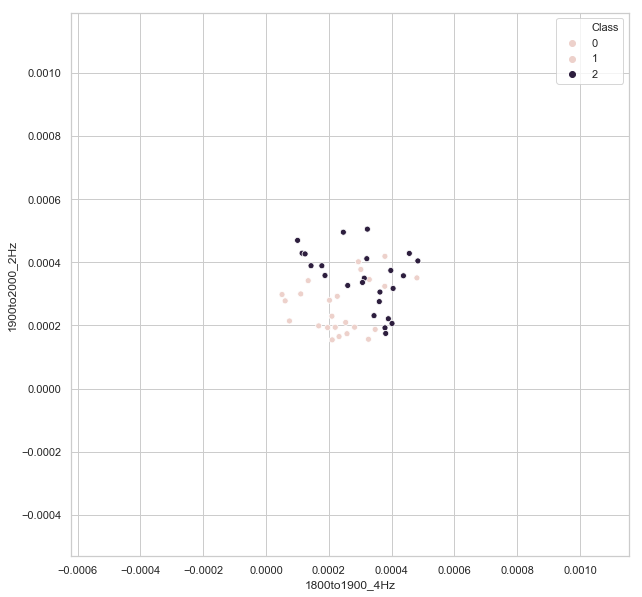

In [14]:
plt.figure(num=None, figsize=(10, 10))
dataset_float['Class'] = dataset_float['Class'].astype(int)
sns.scatterplot(x='1800to1900_4Hz', y='1900to2000_2Hz', hue='Class', data=dataset_float)

In [111]:
from sklearn.decomposition import PCA

target = 'Class'
x = dataset.drop(columns=[target]).values
pca = PCA()
principalComponents = pca.fit_transform(x)
dataset_pca = pd.DataFrame(data = principalComponents)
dataset_pca.columns = ['pc' + str(col) for col in dataset_pca.columns.tolist()]

dataset_pca = pd.concat([dataset_pca, dataset[[target]]], axis = 1)

print(pca.explained_variance_ratio_) 

dataset_pca.head()

[0.29590713 0.19068072 0.16423475 0.08179644 0.06833489 0.05853895
 0.04689036 0.03785138 0.02617295 0.01641645 0.0069854  0.00619059]


,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,Class
0,-0.000317,0.000015,-0.000096,-0.000113,-0.000024,4.597524e-05,-0.000112,-0.000068,0.000045,0.000006,-0.000019,0.000045,1
1,-0.000178,-0.000133,0.000083,-0.000144,0.000219,5.179503e-05,0.000003,0.000114,0.000004,0.000003,-0.000018,-0.000004,1
2,-0.000241,-0.000294,0.000126,-0.000061,0.000259,-2.850092e-05,0.000057,0.000039,0.000058,0.000027,0.000022,0.000034,1
3,-0.000292,-0.000279,0.000035,-0.000070,0.000221,3.587613e-07,0.000099,0.000016,0.000060,0.000017,-0.000010,-0.000007,1
4,0.000392,0.000125,-0.000096,-0.000032,0.000121,1.369747e-04,-0.000058,0.000227,-0.000006,-0.000016,-0.000045,-0.000006,1


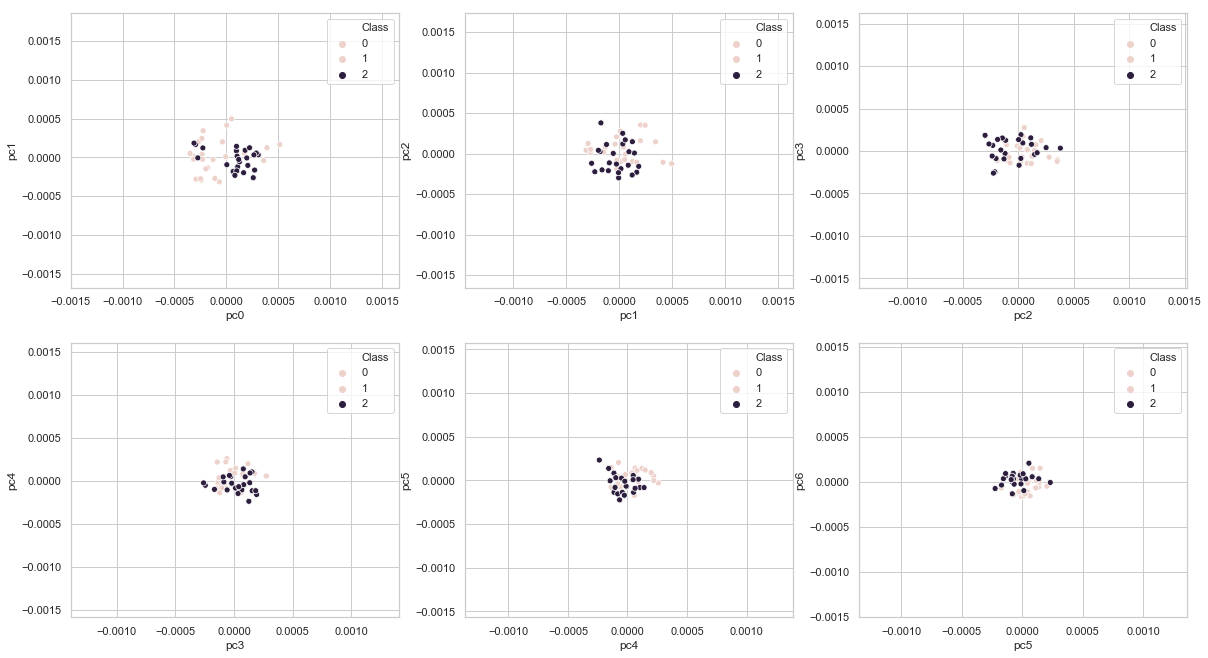

In [474]:
plt.figure(num=None, figsize=(20, 2*len(dataset_float)))

dataset_float = dataset_pca.copy()
dataset_float['Class'] = dataset_float['Class'].astype(int)

for i in range(dataset_float.shape[1]-2):
    plt.subplot(len(raw)/3,3,i+1)
    sns.scatterplot(x='pc'+str(i), y='pc'+str(i+1), hue='Class', data=dataset_float)

C:\Users\Diogo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Diogo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


<Figure size 1080x1080 with 0 Axes>

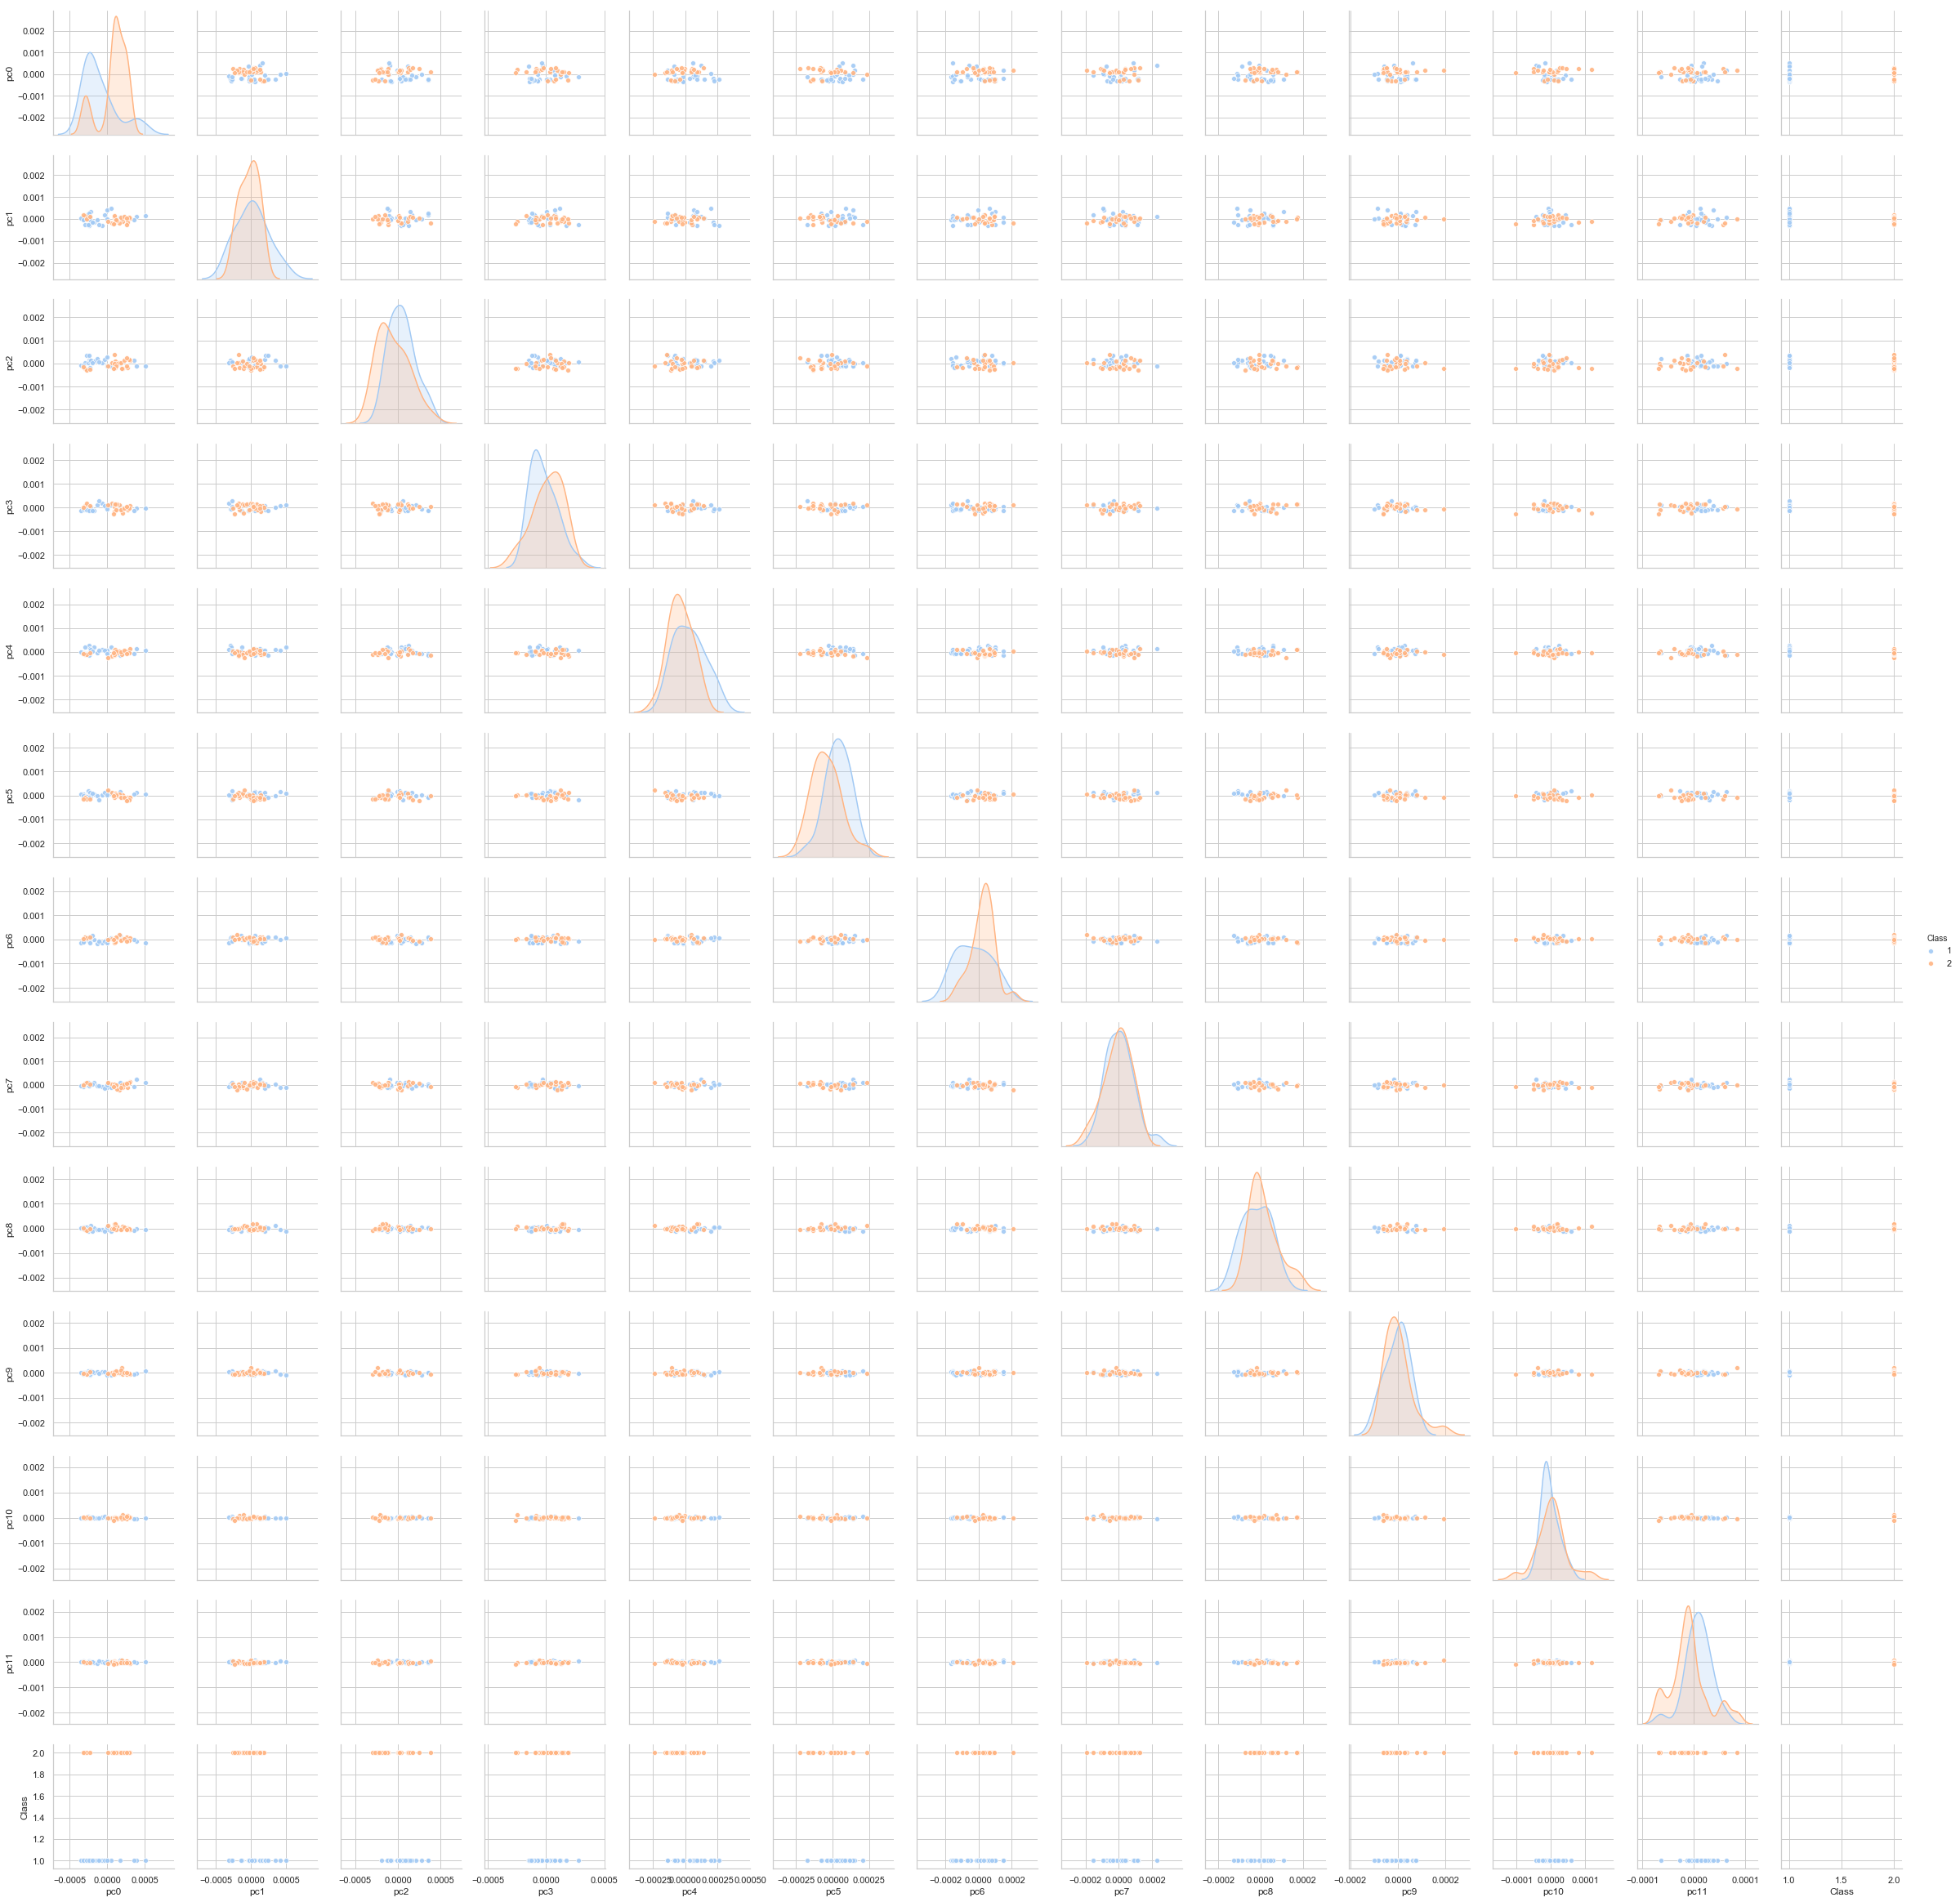

In [145]:
plt.figure(num=None, figsize=(15, 15))
sns.pairplot(dataset_float, hue='Class', plot_kws={'alpha':0.9})

In [149]:
dataset_float = dataset_float.drop(columns=['pc7', 'pc8', 'pc9', 'pc10', 'pc11'])

dataset_float.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,Class
0,-0.000317,0.000015,-0.000096,-0.000113,-0.000024,4.597524e-05,-0.000112,1
1,-0.000178,-0.000133,0.000083,-0.000144,0.000219,5.179503e-05,0.000003,1
2,-0.000241,-0.000294,0.000126,-0.000061,0.000259,-2.850092e-05,0.000057,1
3,-0.000292,-0.000279,0.000035,-0.000070,0.000221,3.587613e-07,0.000099,1
4,0.000392,0.000125,-0.000096,-0.000032,0.000121,1.369747e-04,-0.000058,1


C:\Users\Diogo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Diogo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Diogo\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


<Figure size 432x288 with 0 Axes>

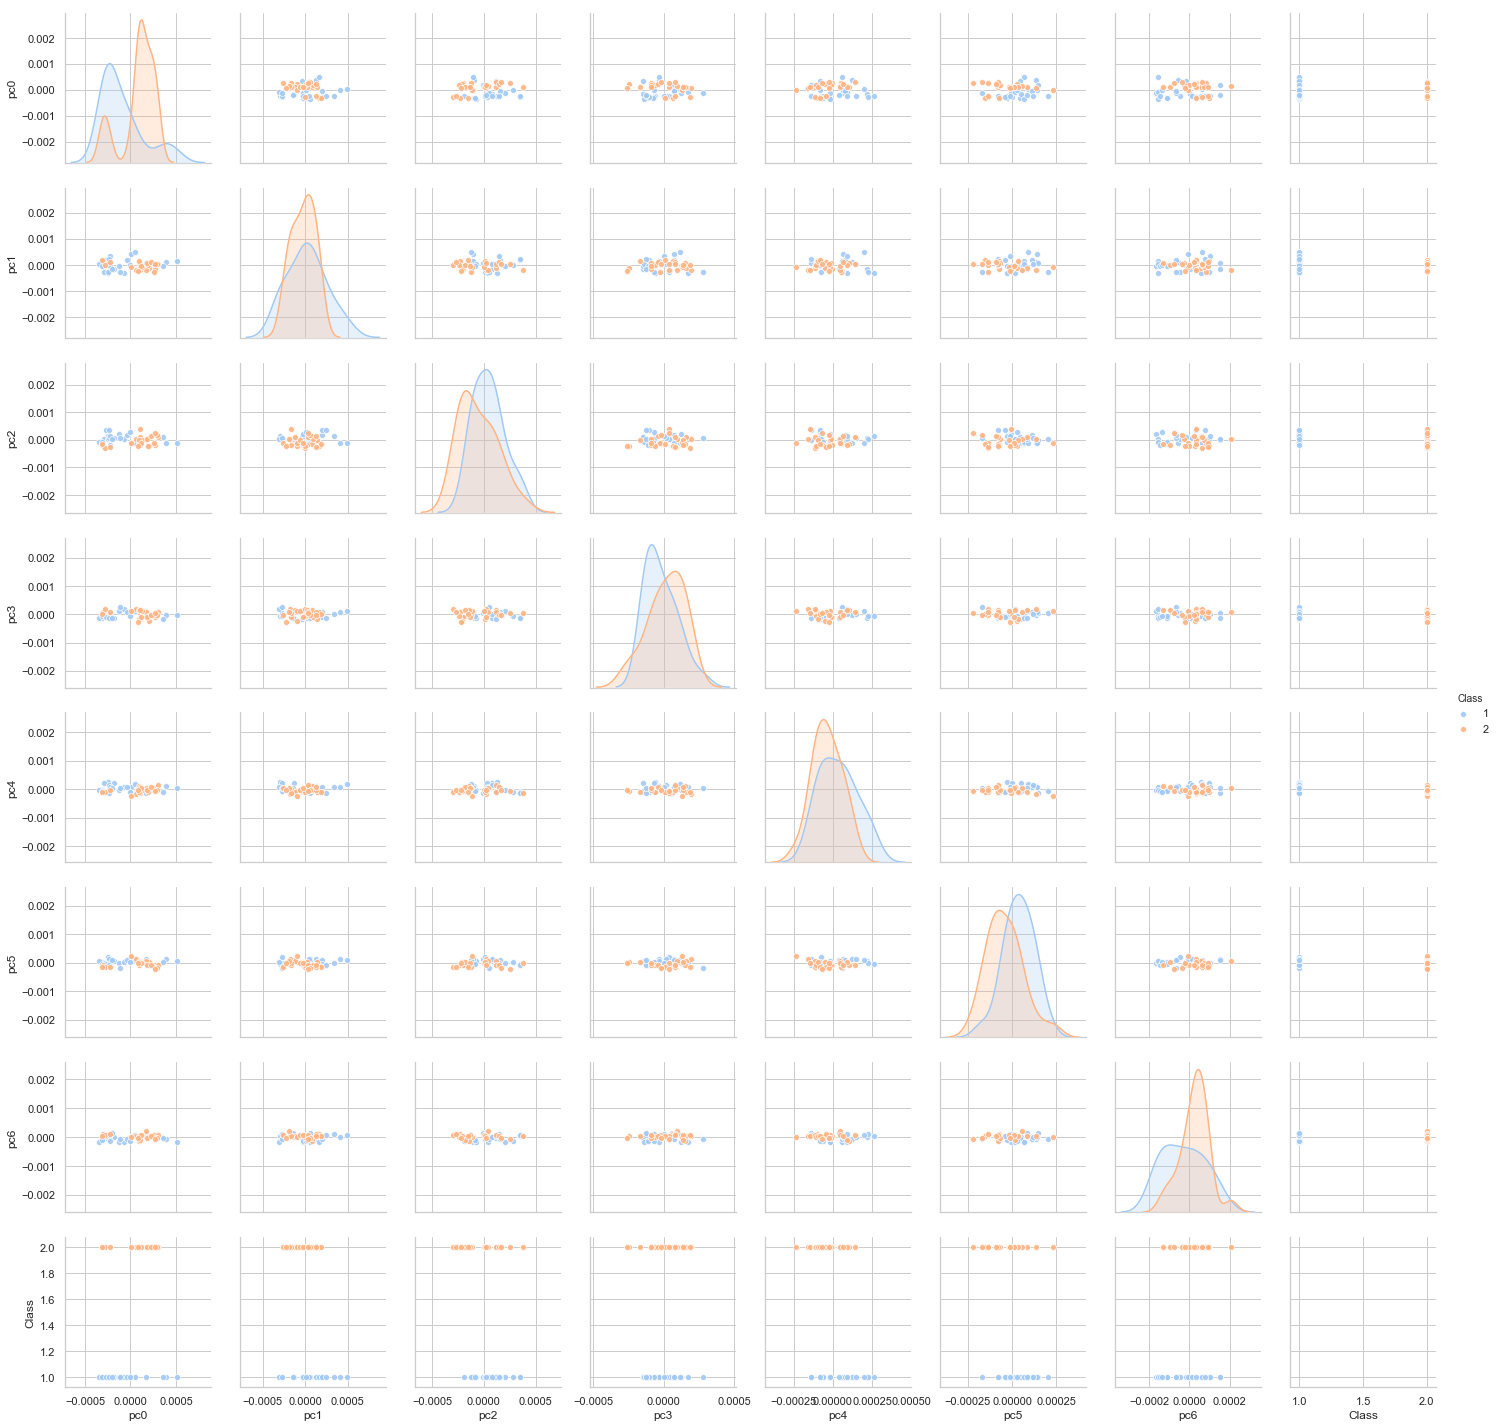

In [150]:
plt.figure(num=None)
sns.pairplot(dataset_float, hue='Class', plot_kws={'alpha':0.9})

In [927]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, GMM
from sklearn.model_selection import train_test_split

In [928]:
target = 'Class'

dataset_float['Class'] = dataset_float['Class'].astype(int)
X = dataset_float.drop(columns={target}).values
y = dataset_float[target].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4)#, random_state=42)

In [954]:
classifiers = [
    KNeighborsClassifier(2),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# iterate over classifiers
for clf in classifiers:
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('score = ' + str(score) + ' : ' + clf.__class__.__name__)

score = 0.8 : KNeighborsClassifier
score = 0.35 : GaussianProcessClassifier
score = 0.65 : DecisionTreeClassifier
score = 0.8 : RandomForestClassifier
score = 0.35 : MLPClassifier
score = 0.75 : AdaBoostClassifier
score = 0.8 : BaggingClassifier
score = 0.85 : DecisionTreeClassifier
score = 0.8 : GaussianNB
score = 0.75 : QuadraticDiscriminantAnalysis


C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [935]:
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt

params = {
        #'weights': ['uniform', 'distance'],
        #'metric' : ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath'],
        'max_iter': [100, 200, 300, 400, 500],
        'tol': [.0001, .00001, .000001, .0000001],
        }

clf = GridSearchCV(KMeans(2), param_grid=params, cv=5)
clf.fit(X_train, y_train)

print(' best_params = ' + str(clf.best_params_))
print('Train score: ' + str(round(clf.score(X_train, y_train)*100, 1)), '%')
print('Test score:  ' + str(round(clf.score(X_test, y_test)*100, 1)), '%')

 best_params = {'max_iter': 200, 'tol': 1e-06}
Train score: -0.0 %
Test score:  -0.0 %


In [931]:
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt

params = {
        'weights': ['uniform', 'distance'],
        'metric' : ['euclidean', 'l2', 'l1', 'manhattan', 'cityblock', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath'],
        #'max_iter': [100, 200, 300, 400, 500],
        #'tol': [.0001, .00001, .000001, .0000001],
        }

clf = GridSearchCV(KNeighborsClassifier(2), param_grid=params, cv=5)
clf.fit(X_train, y_train)

print(' best_params = ' + str(clf.best_params_))
print('Train score: ' + str(round(clf.score(X_train, y_train)*100, 1)), '%')
print('Test score:  ' + str(round(clf.score(X_test, y_test)*100, 1)), '%')

 best_params = {'metric': 'chebyshev', 'weights': 'uniform'}
Train score: 100.0 %
Test score:  80.0 %


In [914]:
def encode_hack(y_pred, y_train):
    #assuming 0->1 and 1->2
    y_pred = y_pred + 1
    
    score = (y_pred==y_train).sum()/y_train.shape[0]
    
    key_assumption = (score>0.5)
    #if wrong assumption then make it 0->2 and 1->1
    
    return y_pred, key_assumption

def encode(y_pred, key_assumption=True):
    if (key_assumption):
        y_pred = y_pred + 1
        
    else:
        y_pred = np.where(y_pred==0, 2, y_pred)
        
    return y_pred

def normalize(y, max_value=None):
    return_max = False
        
    if max_value is None:
        max_value = np.absolute(X).max()
        return_max = True
        
    y = y / max_value
    
    if (return_max):
        result = y, max_value
    else:
        result = y
    
    return result

In [915]:
gmm = GaussianMixture(2)
norm_key = 1
X_train_norm, norm_key = normalize(X_train)
gmm.fit(X_train_norm)
y_clas = gmm.predict(X_train_norm)
y_clas, encode_key = encode_hack(y_clas, y_train)
y_pred = encode(gmm.predict(normalize(X_test, norm_key)), encode_key)

print('Train score: ' + str(round((y_clas==y_train).sum()*100/y_train.shape[0], 1)), '%')
print('Test score:  ' + str(round((y_test==y_pred).sum()*100/y_pred.shape[0], 1)), '%')

Train score: 57.1 %
Test score:  45.0 %


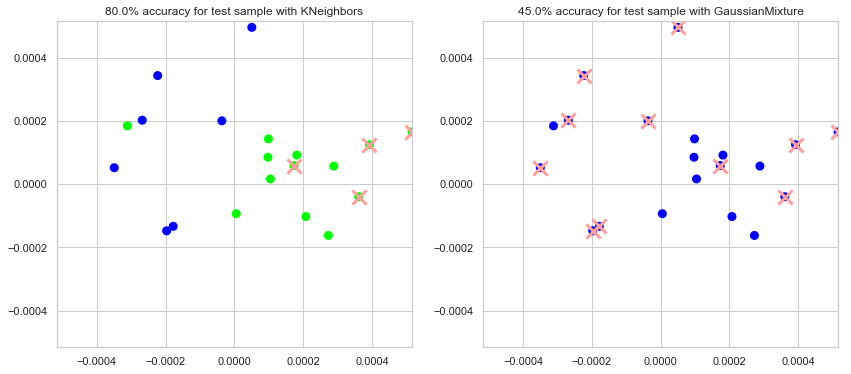

In [916]:
plt.figure(num=None, figsize=(14, 6))

plt.subplot(1,2,1)
X = X_test
y = y_test
y_pred = clf.predict(X)
limit = np.absolute(X).max()

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='brg', linewidth=3);
axes = plt.gca()
axes.set_xlim([-limit,limit])
axes.set_ylim([-limit,limit])

misclassifications = y != y_pred
plt.scatter(X[misclassifications, 0], X[misclassifications, 1], s=200, c='r', marker='x', linewidth=3);
score = round((1 - misclassifications.sum()/y_pred.shape[0])*100, 1)
plt.title(str(score) + '% accuracy for test sample with KNeighbors')# + clf.__class__.__name__)


plt.subplot(1,2,2)
X = normalize(X_test, norm_key)
y = y_test
y_pred = encode(gmm.predict(X), encode_key)
X = X * norm_key
limit = np.absolute(X).max()

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='brg', linewidth=3);
plt.title('Predictions of test sample with ' + gmm.__class__.__name__)
axes = plt.gca()
axes.set_xlim([-limit,limit])
axes.set_ylim([-limit,limit])

misclassifications = y != y_pred
plt.scatter(X[misclassifications, 0], X[misclassifications, 1], s=200, c='r', marker='x', linewidth=3);
score = round((1 - misclassifications.sum()/y_pred.shape[0])*100, 1)
plt.title(str(score) + '% accuracy for test sample with ' + gmm.__class__.__name__)

plt.show()

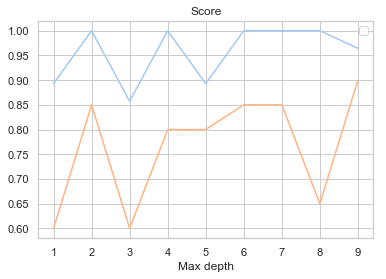

In [846]:
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt

param_grid = {#"max_depth": [1, 2, 3, 4],
              "max_features": [1, 2, 3, 4, 5],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

y=[]
clfs=[]
base_estimator__max_depth = range(1,10)
for n in base_estimator__max_depth:
    clf = GridSearchCV(RandomForestClassifier(n_estimators=2, max_depth=n)
                       , param_grid=param_grid, cv=5)
    clf.fit(X_train, y_train)
    y.append([clf.score(X_train, y_train), clf.score(X_test, y_test)])
    clfs.append(clf)

    
fig = plt.figure()
ax = plt.axes()
ax.legend(['train', 'test'])
plt.title('Score')
plt.xlabel('Max depth')
ax.plot(base_estimator__max_depth, y)

In [849]:
from sklearn.cross_validation import cross_val_score

best_model = 1
clf = clfs[best_model]
scores = cross_val_score(clf, X_test, y_test, cv=5)
print('Cross-validated scores range: (' + str(round(scores.mean()*100,1)) + ' +- ' + str(round(scores.std()*2*100,1)) + ' )%')

Cross-validated scores range: (65.0 +- 40.0 )%


In [848]:
from sklearn.cross_validation import cross_val_score

clf = GaussianNB()
scores = cross_val_score(clf, X_test, y_test, cv=5)
print('Cross-validated scores range: (' + str(round(scores.mean()*100,1)) + ' +- ' + str(round(scores.std()*2*100,1)) + ' )%')

Cross-validated scores range: (65.0 +- 40.0 )%


C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
C:\Users\Diogo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


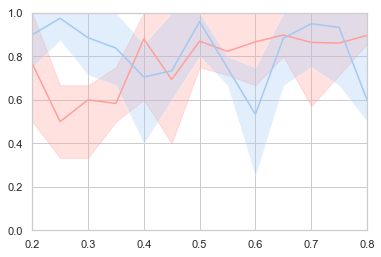

In [965]:
sizes = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
results_test = []
results_train = []
folds = 5

target = 'Class'
dataset_float['Class'] = dataset_float['Class'].astype(int)
X = dataset_float.drop(columns={target}).values
y = dataset_float[target].values

for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size)

    clf = KNeighborsClassifier(2)
    clf.fit(X_train, y_train)

    scores = cross_val_score(clf, X_test, y_test, cv=folds)
    results_test.append([scores.mean(), scores.max(), scores.min()])

    scores = cross_val_score(clf, X_train, y_train, cv=folds)
    results_train.append([scores.mean(), scores.max(), scores.min()])


results_test_pd = pd.DataFrame(results_test).transpose()
results_train_pd = pd.DataFrame(results_train).transpose()

alpha=0.3

plt.fill_between(sizes, results_test_pd.iloc[2,:], results_test_pd.iloc[1,:], alpha=alpha, color='r')
plt.fill_between(sizes, results_train_pd.iloc[2,:], results_train_pd.iloc[1,:], alpha=alpha)
plt.plot(sizes, results_test_pd.iloc[0,:], c='r')
plt.plot(sizes, results_train_pd.iloc[0,:])
plt.ylim((0, 1))
plt.xlim((np.min(sizes), np.max(sizes)))

plt.show()